In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers.legacy import SGD
from sklearn.model_selection import GridSearchCV 
from scikeras.wrappers import KerasRegressor
from kerastuner.tuners import RandomSearch

from sklearn.linear_model import LinearRegression

In [117]:
X = pd.read_excel("cassav.xlsx", "X")
y = pd.read_excel("cassav.xlsx", "Y")["tbc"]

In [118]:
y.head()

0    1.580682
1    7.855163
2    1.775951
3    9.424721
4    6.334714
Name: tbc, dtype: float64

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((224, 1050), (56, 1050), (224,), (56,))

In [120]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

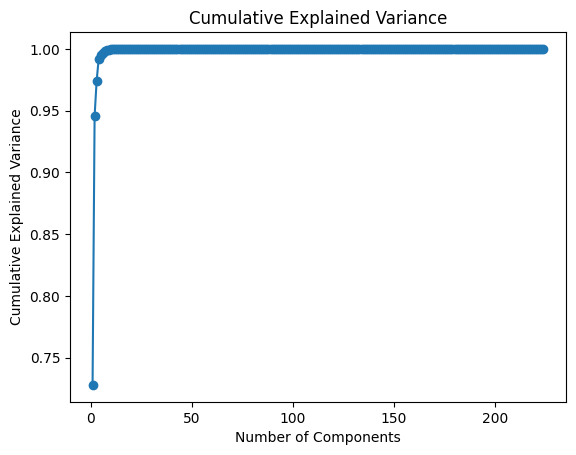

In [121]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

In [122]:
# for i in range (1, 200):
#     pca = PCA(i)
#     X_train_pca = pca.fit_transform(X_train)
#     X_test_pca = pca.transform(X_test)

#     lr = LinearRegression()
#     lr.fit(X_train_pca, y_train)
#     y_pred = lr.predict(X_test_pca)
#     print(i, r2_score(y_test, y_pred))

In [123]:
n_components = 60
pca = PCA(n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [124]:
model = keras.Sequential([
    layers.Dense(36, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='linear')
])
optimizer=SGD(learning_rate=1e-3, momentum=0.9, decay=1e-2/500)
# Compile the model
model.compile(optimizer='adam',
              loss='mse',  
              metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=12, validation_data=(X_test, y_test))


Epoch 1/300
19/19 [==============================] - 1s 14ms/step - loss: 18.8001 - mae: 3.2411 - val_loss: 8.3845 - val_mae: 2.2499
Epoch 2/300
19/19 [==============================] - 0s 5ms/step - loss: 10.9116 - mae: 2.5959 - val_loss: 5.8576 - val_mae: 1.9799
Epoch 3/300
19/19 [==============================] - 0s 5ms/step - loss: 7.6842 - mae: 2.1643 - val_loss: 4.4096 - val_mae: 1.6867
Epoch 4/300
19/19 [==============================] - 0s 5ms/step - loss: 6.1434 - mae: 1.9492 - val_loss: 3.7793 - val_mae: 1.5895
Epoch 5/300
19/19 [==============================] - 0s 4ms/step - loss: 5.5118 - mae: 1.8871 - val_loss: 4.5690 - val_mae: 1.7517
Epoch 6/300
19/19 [==============================] - 0s 5ms/step - loss: 4.6508 - mae: 1.7009 - val_loss: 3.1142 - val_mae: 1.4548
Epoch 7/300
19/19 [==============================] - 0s 4ms/step - loss: 4.3500 - mae: 1.6965 - val_loss: 3.1496 - val_mae: 1.4594
Epoch 8/300
19/19 [==============================] - 0s 5ms/step - loss: 4.2122 

In [125]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

2/2 [==============================] - 0s 4ms/step


0.9468897344147287

In [126]:
# def build_model(hp):
#     model = keras.Sequential()
#     model.add(layers.Input(shape=(X_train_pca.shape[1],)))
#     for i in range (hp.Int('layers', 1, 3)):
#         model.add(layers.Dense(units=hp.Int('unit_' + str(i), min_value=2, max_value=60, step=2)
#                                , activation=hp.Choice('act_'+str(i), ['relu', 'tanh'])))
#     model.add(layers.Dense(1, activation='linear'))
#     model.compile(optimizer='adam',
#                     loss = 'mse', metrics = ['mae'])
#     return model
# tuner = RandomSearch(
#     build_model,
#     objective = 'val_mae',
#     max_trials = 10,
#     executions_per_trial = 3,
# )
# tuner.search(X_train_pca, y_train, epochs=220, validation_data=(X_test_pca, y_test), batch_size=12)
# tuner.results_summary()
